In [1]:
#############################################################
## Ramsey Growth model - toolbox 						   ##
## Copyright: Tobias König, Humboldt-Universität zu Berlin ##
#############################################################

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

Define $c_0$ and $k_0$ as initial conditions

In [3]:
print("Initial conditions:")
#icdict={'x':input('Capital.Initial: '),'y':input('Consumption_Initial: ')}
X0 = np.array([input('Capital.Initial: '),input('Consumption_Initial: ')])
X0 = X0.astype(float)

Initial conditions:
Capital.Initial: 2.0
Consumption_Initial: 0.5


Define the parameter values 

In [4]:
print("Define parameters:")
pardict={'n':0.00,'alpha':0.33333,'delta':0.1,'theta':0.06 ,'A':1.0,'b':0.0}
#pardict={'n':input('population growth:'),'alpha':input('capital share:'),'delta':input('depreciation rate:'),'theta':input('time preference:') ,'A':input('technology:'),'b':0.2}
for name, value in pardict.items():
    print("The parameter %s is set to %r"%(name,value))

Define parameters:
The parameter n is set to 0.0
The parameter alpha is set to 0.33333
The parameter delta is set to 0.1
The parameter theta is set to 0.06
The parameter A is set to 1.0
The parameter b is set to 0.0


We define a pre-specified grid for consumption and capital 

In [5]:
# Define grid 
temp_k = (7.0-0)/100
temp_c = (3.0-0)/100
k_grid = [temp_k]
c_grid = [temp_c]
for jj in range(1,100):
	temp_k = (7.0-0)/100+temp_k
	temp_c = (3.0-0)/100+temp_c
	k_grid.append(temp_k)
	c_grid.append(temp_c)

In [6]:
k_grid = np.array(k_grid)
c_grid = np.array(c_grid)
c_grid_init = c_grid
print(k_grid)
print(c_grid)

[0.07 0.14 0.21 0.28 0.35 0.42 0.49 0.56 0.63 0.7  0.77 0.84 0.91 0.98
 1.05 1.12 1.19 1.26 1.33 1.4  1.47 1.54 1.61 1.68 1.75 1.82 1.89 1.96
 2.03 2.1  2.17 2.24 2.31 2.38 2.45 2.52 2.59 2.66 2.73 2.8  2.87 2.94
 3.01 3.08 3.15 3.22 3.29 3.36 3.43 3.5  3.57 3.64 3.71 3.78 3.85 3.92
 3.99 4.06 4.13 4.2  4.27 4.34 4.41 4.48 4.55 4.62 4.69 4.76 4.83 4.9
 4.97 5.04 5.11 5.18 5.25 5.32 5.39 5.46 5.53 5.6  5.67 5.74 5.81 5.88
 5.95 6.02 6.09 6.16 6.23 6.3  6.37 6.44 6.51 6.58 6.65 6.72 6.79 6.86
 6.93 7.  ]
[0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3  0.33 0.36 0.39 0.42
 0.45 0.48 0.51 0.54 0.57 0.6  0.63 0.66 0.69 0.72 0.75 0.78 0.81 0.84
 0.87 0.9  0.93 0.96 0.99 1.02 1.05 1.08 1.11 1.14 1.17 1.2  1.23 1.26
 1.29 1.32 1.35 1.38 1.41 1.44 1.47 1.5  1.53 1.56 1.59 1.62 1.65 1.68
 1.71 1.74 1.77 1.8  1.83 1.86 1.89 1.92 1.95 1.98 2.01 2.04 2.07 2.1
 2.13 2.16 2.19 2.22 2.25 2.28 2.31 2.34 2.37 2.4  2.43 2.46 2.49 2.52
 2.55 2.58 2.61 2.64 2.67 2.7  2.73 2.76 2.79 2.82 2.85 2.88 2.91 2

In [7]:
# Define the step size of k
dk =  np.gradient(k_grid)

In [8]:
# Define differential matrix for v'(k), the value function
Delta = np.zeros(shape=(len(c_grid),len(c_grid)))

Delta[0][0] = -1/dk[0]
Delta[0][1] = 1/dk[0]
Delta[-1][-1] = 1/dk[0]
Delta[-1][-2] = -1/dk[0]


In [9]:
for i in range(1,len(c_grid)-1):
	Delta[i][i-1] = -0.5/dk[0]
	Delta[i][i+1] = 0.5/dk[0]

We solve the policy function of the model. 

In [10]:
# Solve policy function
epsi = 1e-6
c_policy = np.zeros(shape=(len(c_grid)))
c_0 = np.zeros(shape=(len(c_grid)))
diff = 10
iter = 0

while diff > epsi:
	c_0 = c_grid
	dc0 = np.matmul(Delta,np.transpose(c_0))
	#c_1 = np.dot(dc0,np.divide((np.power(k,pardict['alpha'])-pardict['delta']*k),((pardict['alpha']*np.power(k,pardict['alpha']-1)-pardict['n']-pardict['delta']-pardict['theta'])+dc0)))
	c_1 = dc0*(pardict['A']*k_grid**(pardict['alpha'])-pardict['delta']*k_grid)/((pardict['A']*pardict['alpha']*k_grid**(pardict['alpha']-1)-pardict['n']-pardict['delta']-pardict['theta'])+dc0)
	diff = np.max(np.abs(c_1-c_0))
	c_0 = 0.001*c_1+(1-0.001)*c_0 # 0.0001
	#c_0 = c_1
	#print c_0
	iter +=1
	if iter % 50 == 0:
		print(diff)
	c_grid = c_0

c_policy = c_0 
print(c_policy)

1.4674744987324793
1.382045553547787
1.3000285721262974
1.221248866089145
1.1455524800858632
1.072807400636988
1.00290383703425
0.9357542068215048
0.871294743661376
0.8094901977591102
0.7503383941345305
0.6938659561410372
0.6401135068575241
0.5891278797753576
0.5409685760306784
0.49569313844975094
0.4533265509697013
0.41387718633495196
0.3773296441730982
0.3436135115889427
0.3126523888864696
0.2843193253848524
0.2584776720487907
0.23497441348107673
0.21363488757835536
0.194306951762363
0.17680051142683872
0.16098445590783927
0.14666731116951315
0.13375024949475844
0.12204806553073566
0.11149509822582804
0.10192039047202806
0.09328000129565073
0.08543254295865332
0.07833126196626972
0.07188717618975127
0.06602500541706613
0.06071508412152227
0.055865944592296435
0.051457444263394825
0.04744932135137048
0.043766092611930096
0.040430359389244996
0.03736670981284984
0.03455724432651186
0.031999202554731765
0.02964689419190769
0.027481721758515487
0.025503252159879253
0.02368059599179828
0.

### Find nullclines  

Here we define the nullclines for the system of differential equations:

In [11]:
null_x = pardict['A']*k_grid ** pardict['alpha']-(pardict['delta']+pardict['n'])*k_grid
null_y = 1.0/0.00001*(pardict['alpha']*pardict['A']*k_grid**(pardict['alpha']-1)-pardict['n']-pardict['delta']-pardict['theta'])

### Find steady state 

In this section we find the steady state of the model. 

In [12]:
# Find the steady state 
k_ss=((pardict['n']+pardict['delta']+pardict['theta'])/(pardict['alpha']*pardict['A']))**(1/(pardict['alpha']-1))
c_ss = pardict['A']*k_ss ** pardict['alpha']-(pardict['delta']+pardict['n'])*k_ss

print("The capital steady state is %r"%k_ss)
print("The consumption steady state is %r"%c_ss)

The capital steady state is 3.006970994234862
The consumption steady state is 1.1426634114143557


### System of differential equations and phase diagram 

We define the system of differential equations for the Ramsey model. This allows us to compute a trajectory for any initial starting point in the phase diagram

In [13]:
# Define the system of differential equations
def dX_dt(X,t=0):
	return np.array([(pardict['A']*X[0] ** pardict['alpha'])-X[1] -(pardict['delta']+pardict['n'])*X[0],
				X[1]*(pardict['alpha']*pardict['A']*X[0] **(pardict['alpha']-1)-pardict['n']-pardict['delta']-pardict['theta']-0.00001*X[1])])

In [14]:
t = np.linspace(0,3,3)
# Compute trajectory for initial conditions
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message'] 

'Integration successful.'

In [15]:
# Compute grid and arrows

k_grid_arrows = np.linspace(0,7,20)
c_grid_arrows = np.linspace(0,3,20)

K_1,C_1 = np.meshgrid(k_grid_arrows,c_grid_arrows)
X_grid = np.array([K_1,C_1])

DK,DC = dX_dt(X_grid)

# Norm of the growth rate 
M = (np.hypot(DK, DC))
# Avoid zero division errors                            
M[ M == 0] = 1.  
# Normalize each arrows                               
#DK /= M                                        
#DC /= M

<ipython-input-13-b803f80081a9>:4: RuntimeWarning: divide by zero encountered in power
  X[1]*(pardict['alpha']*pardict['A']*X[0] **(pardict['alpha']-1)-pardict['n']-pardict['delta']-pardict['theta']-0.00001*X[1])])
<ipython-input-13-b803f80081a9>:4: RuntimeWarning: invalid value encountered in multiply
  X[1]*(pardict['alpha']*pardict['A']*X[0] **(pardict['alpha']-1)-pardict['n']-pardict['delta']-pardict['theta']-0.00001*X[1])])


## Figures

Plot the time path of capital and consumption in a diagram with time on the x-axis and the value of the variables on the y-axis.

Text(0.5, 0, 't')

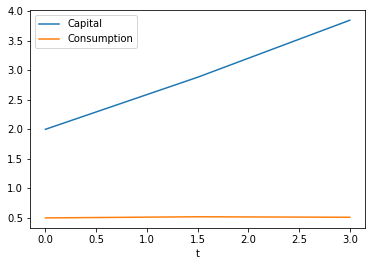

In [16]:
plt.figure(1)
plt.plot(t, X[:,0], label='Capital')
plt.plot(t, X[:,1], label='Consumption')
plt.legend()
plt.xlabel('t')


Plot the phase diagram, together with the trajectory, the nullclines, the steady state and the saddle path.

(0.0, 3.0)

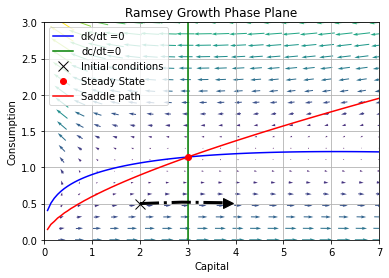

In [17]:
plt.figure(2)

# plot the nullclines
plt.plot(k_grid,null_x,  'b',label='dk/dt =0')
plt.plot(k_grid,null_y, 'g',label='dc/dt=0')

# plot the trajectory
plt.plot(X[:,0],X[:,1], 'k-.', linewidth=3)

# plot the initial points separately
plt.plot(X[0,0],X[0,1],'kx',ms=10,label='Initial conditions')
plt.plot(X[-1,0],X[-1,1],'k>',ms=10)

# Plot the Steady State 
plt.plot(k_ss,c_ss,'ro',label='Steady State')

# Plot the saddle path
plt.plot(k_grid, c_policy,'r',label='Saddle path')

# Plot the dynamics
Q = plt.quiver(K_1, C_1, DK, DC,M, pivot='mid')#, cmap=plt.cm.jet), M

plt.title('Ramsey Growth Phase Plane')
plt.xlabel('Capital')
plt.ylabel('Consumption')
plt.axis('tight')
plt.legend(loc='upper left')
plt.grid()
plt.xlim(0, 7)
plt.ylim(0, 3)

## Transitory Technology Shock

(0.0, 3.0)

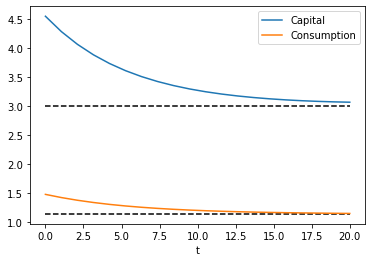

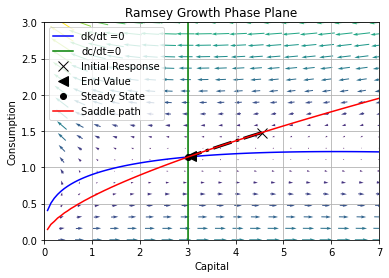

In [18]:
 t = np.linspace(0,20,20)

# Choose a on-grid capital value for the shock, to make life easier
index_k_A = np.where(np.isclose(k_grid, 4.55))
c_shock = c_policy[index_k_A]
X0 = np.array([4.55,c_shock],dtype=object)
X0 = X0.astype(float)

# Compute trajectory for initial conditions
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message'] 

plt.figure(3)
plt.plot(t,np.repeat(k_ss,np.shape(t)),'--k')
plt.plot(t,np.repeat(c_ss,np.shape(t)),'--k')
plt.plot(t, X[:,0], label='Capital')
plt.plot(t, X[:,1], label='Consumption')
plt.legend()
plt.xlabel('t')

plt.figure(4)

# plot the nullclines
plt.plot(k_grid,null_x,  'b',label='dk/dt =0')
plt.plot(k_grid,null_y, 'g',label='dc/dt=0')

# plot the trajectory
plt.plot(X[:,0],X[:,1], 'k-.', linewidth=3)

# plot the initial points separately
plt.plot(X[0,0],X[0,1],'kx',ms=10,label='Initial Response')
plt.plot(X[-1,0],X[-1,1],'k<',ms=10,label='End Value')

# Plot the Steady State 
plt.plot(k_ss,c_ss,'ko',label='Steady State')

# Plot the saddle path
plt.plot(k_grid, c_policy,'r',label='Saddle path')

# Plot the dynamics
Q = plt.quiver(K_1, C_1, DK, DC,M, pivot='mid')#, cmap=plt.cm.jet), M

plt.title('Ramsey Growth Phase Plane')
plt.xlabel('Capital')
plt.ylabel('Consumption')
plt.axis('tight')
plt.legend()
plt.grid()
plt.xlim(0, 7)
plt.ylim(0, 3)

In [19]:
index_k_A = np.where(np.isclose(k_grid, 4.5))
print(index_k_A)

(array([], dtype=int64),)


## New technology level

<ipython-input-20-bffe04bcd519>:43: RuntimeWarning: divide by zero encountered in power
  X[1]*(pardict['alpha']*pardict['A']*X[0] **(pardict['alpha']-1)-pardict['n']-pardict['delta']-pardict['theta']-0.00001*X[1])])
<ipython-input-20-bffe04bcd519>:43: RuntimeWarning: invalid value encountered in multiply
  X[1]*(pardict['alpha']*pardict['A']*X[0] **(pardict['alpha']-1)-pardict['n']-pardict['delta']-pardict['theta']-0.00001*X[1])])
<ipython-input-20-bffe04bcd519>:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X0 = np.array([k_ss,c_shock])


(0.0, 3.0)

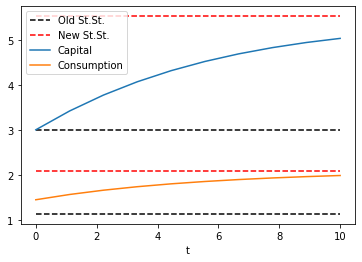

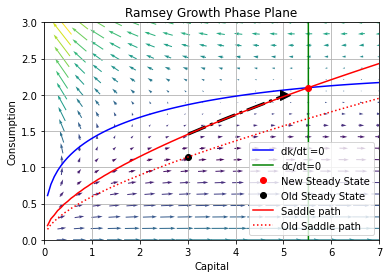

In [20]:
t = np.linspace(0,20,40)

pardict={'n':0.00,'alpha':0.33333,'delta':0.1,'theta':0.06 ,'A':1.5,'b':0.0}

# Solve policy function
epsi = 1e-6
c_policy_high = np.zeros(shape=(len(c_grid)))
c_0 = np.zeros(shape=(len(c_grid)))
diff = 10
iter = 0


while diff > epsi:
	c_0 = c_grid
	dc0 = np.matmul(Delta,np.transpose(c_0))
	#c_1 = np.dot(dc0,np.divide((np.power(k,pardict['alpha'])-pardict['delta']*k),((pardict['alpha']*np.power(k,pardict['alpha']-1)-pardict['n']-pardict['delta']-pardict['theta'])+dc0)))
	c_1 = dc0*(pardict['A']*k_grid**(pardict['alpha'])-pardict['delta']*k_grid)/((pardict['A']*pardict['alpha']*k_grid**(pardict['alpha']-1)-pardict['n']-pardict['delta']-pardict['theta'])+dc0)
	diff = np.max(np.abs(c_1-c_0))
	c_0 = 0.001*c_1+(1-0.001)*c_0 # 0.0001
	#c_0 = c_1
	#print c_0
	iter +=1
	#if iter % 50 == 0:
		#print(diff)
	c_grid = c_0

c_policy_high = c_0 
#print(c_policy)



# Find nullclines
null_x = pardict['A']*k_grid ** pardict['alpha']-(pardict['delta']+pardict['n'])*k_grid
null_y = 1.0/0.00001*(pardict['alpha']*pardict['A']*k_grid**(pardict['alpha']-1)-pardict['n']-pardict['delta']-pardict['theta'])

# Find the steady state 
k_ss2=((pardict['n']+pardict['delta']+pardict['theta'])/(pardict['alpha']*pardict['A']))**(1/(pardict['alpha']-1))
c_ss2 = pardict['A']*k_ss2 ** pardict['alpha']-(pardict['delta']+pardict['n'])*k_ss2

# Define the system of differential equations
def dX_dt(X,t=0):
	return np.array([(pardict['A']*X[0] ** pardict['alpha'])-X[1] -(pardict['delta']+pardict['n'])*X[0],
				X[1]*(pardict['alpha']*pardict['A']*X[0] **(pardict['alpha']-1)-pardict['n']-pardict['delta']-pardict['theta']-0.00001*X[1])])

t = np.linspace(0,10,10)

K_1,C_1 = np.meshgrid(k_grid_arrows,c_grid_arrows)
X_grid = np.array([K_1,C_1])

DK,DC = dX_dt(X_grid)

# Choose a on-grid capital value for the shock, to make life easier
index_k_A = np.where(np.isclose(k_grid, 3.01))
c_shock = c_policy_high[index_k_A]
X0 = np.array([k_ss,c_shock])
X0 = X0.astype(float)

# Compute trajectory for initial conditions
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message'] 


plt.figure(5)
plt.plot(t,np.repeat(k_ss,np.shape(t)),'--k',label='Old St.St.')
plt.plot(t,np.repeat(c_ss,np.shape(t)),'--k')
plt.plot(t,np.repeat(k_ss2,np.shape(t)),'--r',label='New St.St.')
plt.plot(t,np.repeat(c_ss2,np.shape(t)),'--r')
plt.plot(t, X[:,0], label='Capital')
plt.plot(t, X[:,1], label='Consumption')
plt.legend()
plt.xlabel('t')


plt.figure(6)

# plot the nullclines
plt.plot(k_grid,null_x,  'b',label='dk/dt =0')
plt.plot(k_grid,null_y, 'g',label='dc/dt=0')

# plot the trajectory
plt.plot(X[:,0],X[:,1], 'k-.', linewidth=3)

# plot the initial points separately
# plt.plot(X[0,0],X[0,1],'kx',ms=10,label='Starting Point')
plt.plot(X[-1,0],X[-1,1],'k>',ms=10)

# Plot the Steady State 
plt.plot(k_ss2,c_ss2,'ro',label='New Steady State')

# Plot the old Steady State 
plt.plot(k_ss,c_ss,'ko',label='Old Steady State')

# Plot the saddle path
plt.plot(k_grid, c_policy_high,'r',label='Saddle path')
plt.plot(k_grid, c_policy,':r',label='Old Saddle path')
# Plot the dynamics
Q = plt.quiver(K_1, C_1, DK, DC,M, pivot='mid')#, cmap=plt.cm.jet), M

plt.title('Ramsey Growth Phase Plane')
plt.xlabel('Capital')
plt.ylabel('Consumption')
plt.axis('tight')
plt.legend()
plt.grid()
plt.xlim(0, 7)
plt.ylim(0, 3)
